In [384]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [408]:
df=pd.read_csv('merge_video_game.csv',
               index_col = 0)

## Exploratory data analysis(EDA)

In [409]:
df.describe()

,year,rate,votes,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,400.000000,400.000000,400.00000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,2010.690000,8.361500,10301.84750,3300.448276,1.188498,0.775369,0.067291,0.294064,2.325493
std,4.482648,0.743539,9602.18746,3820.563391,1.731449,1.083115,0.185191,0.663309,3.225921
min,1997.000000,6.400000,536.00000,17.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2008.000000,8.000000,4105.25000,455.000000,0.170000,0.130000,0.000000,0.040000,0.430000
50%,2012.000000,8.400000,6951.00000,1891.500000,0.555000,0.400000,0.000000,0.110000,1.085000
75%,2014.000000,8.925000,14673.00000,4508.500000,1.407500,0.977500,0.060000,0.310000,3.070000
max,2023.000000,9.700000,55776.00000,16375.000000,9.670000,9.270000,2.020000,10.570000,21.400000


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 405
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          406 non-null    object 
 1   year          400 non-null    float64
 2   game_type     406 non-null    object 
 3   rate          400 non-null    float64
 4   votes         400 non-null    float64
 5   Rank          406 non-null    int64  
 6   Platform      406 non-null    object 
 7   NA_Sales      406 non-null    float64
 8   EU_Sales      406 non-null    float64
 9   JP_Sales      406 non-null    float64
 10  Other_Sales   406 non-null    float64
 11  Global_Sales  406 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 41.2+ KB


In [411]:
df.isna().sum()

Name            0
year            6
game_type       0
rate            6
votes           6
Rank            0
Platform        0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [412]:
#df.dropna(inplace=True)
df = df.fillna(df.mean())

In [413]:
df.isna().sum()

Name            0
year            0
game_type       0
rate            0
votes           0
Rank            0
Platform        0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 405
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          406 non-null    object 
 1   year          406 non-null    float64
 2   game_type     406 non-null    object 
 3   rate          406 non-null    float64
 4   votes         406 non-null    float64
 5   Rank          406 non-null    int64  
 6   Platform      406 non-null    object 
 7   NA_Sales      406 non-null    float64
 8   EU_Sales      406 non-null    float64
 9   JP_Sales      406 non-null    float64
 10  Other_Sales   406 non-null    float64
 11  Global_Sales  406 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 41.2+ KB


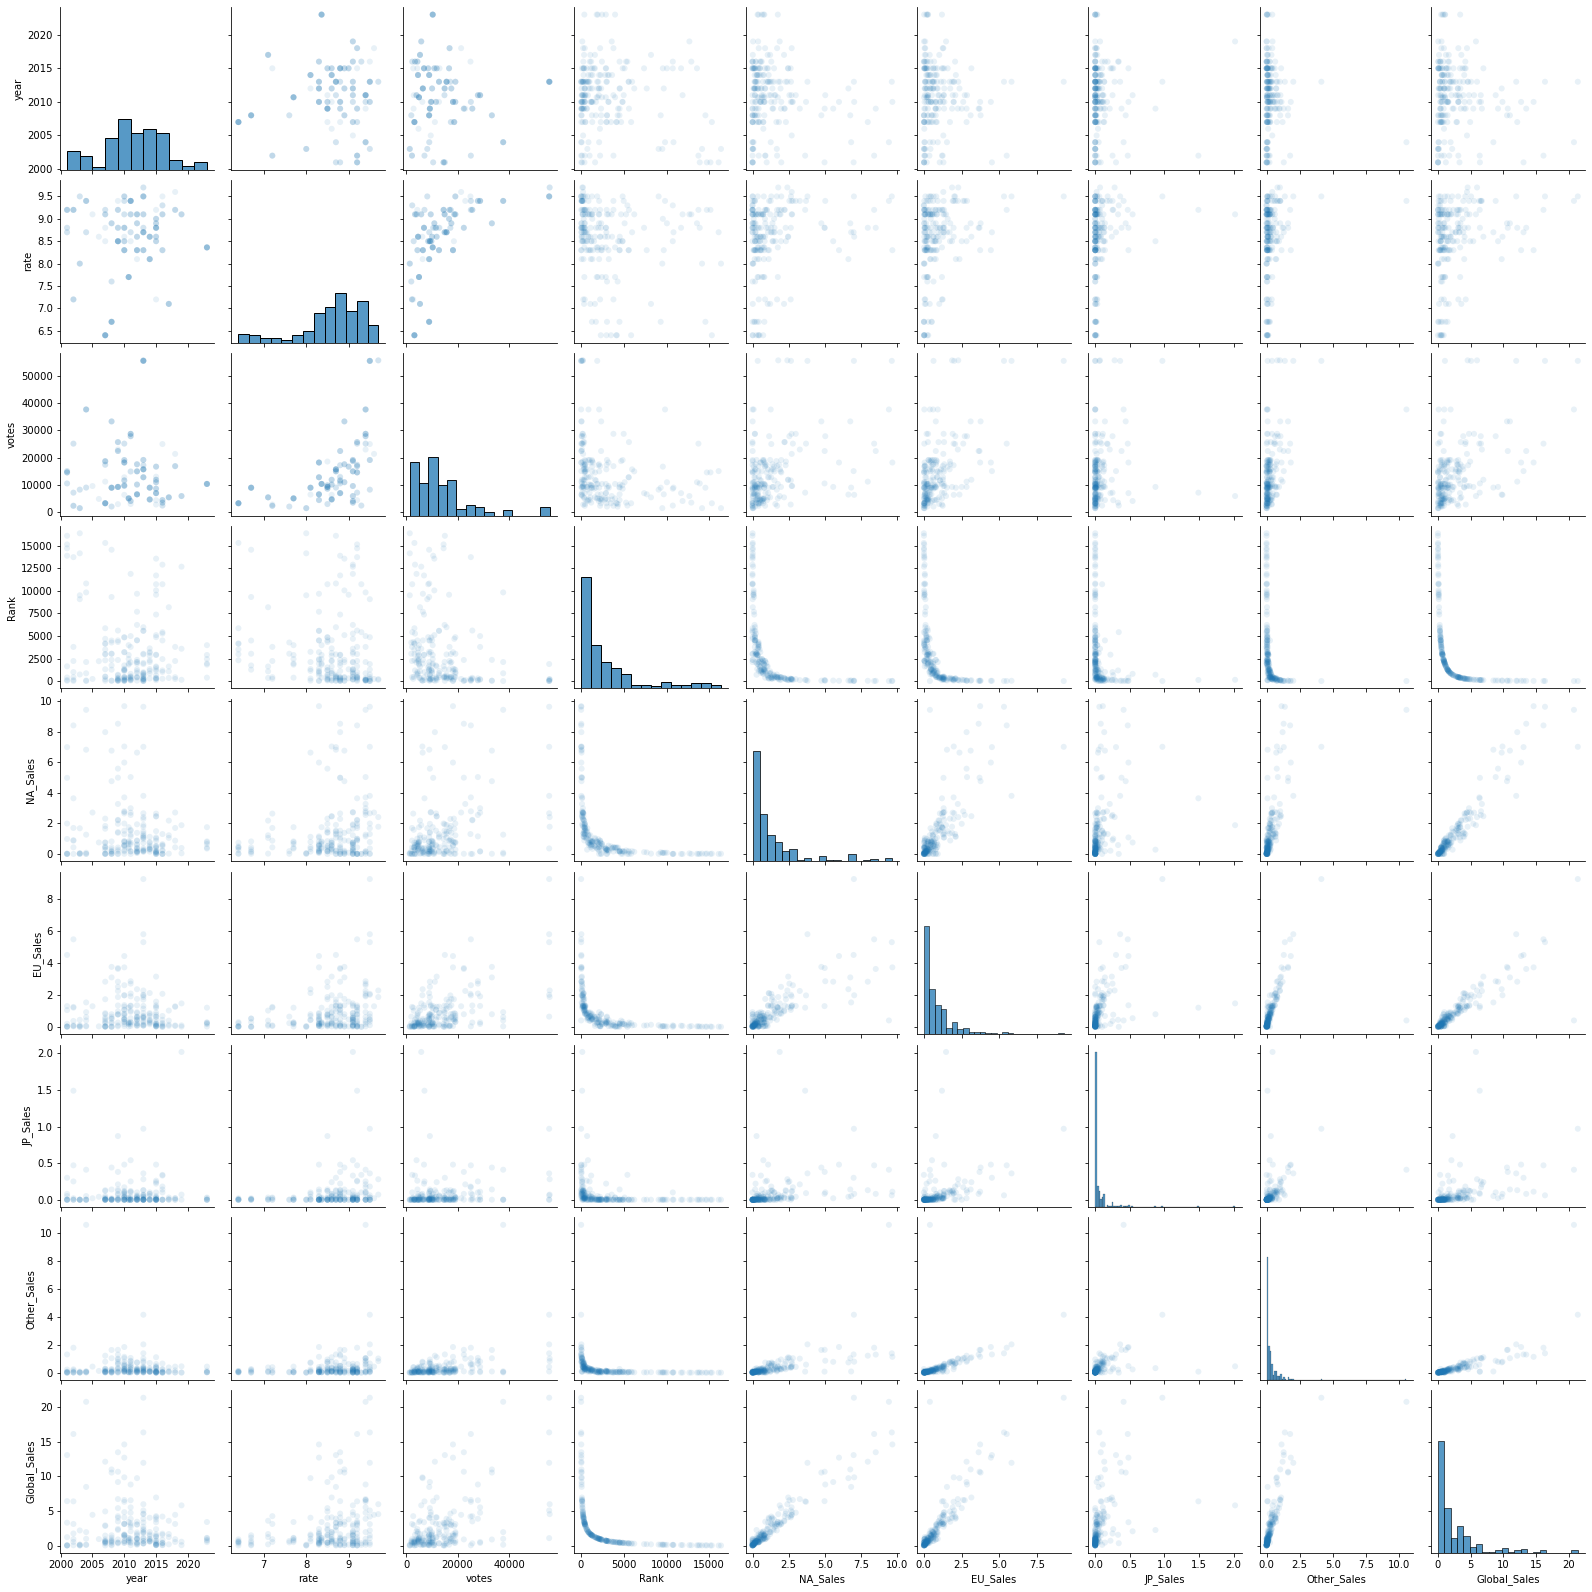

In [392]:
sns.pairplot(df[:200], plot_kws=dict(alpha=.1, edgecolor='none'))

## linear regression

### determine the features and target

In [461]:
#cols = ['year','rate','votes','Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
cols=['JP_Sales','Other_Sales']
x = df[cols]
y = df.Global_Sales

### split data to train and val and test

In [462]:
# hold out 20% of the data for final testing
x, X_test, y, y_test = train_test_split(x, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state= 42)

In [478]:
lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()


In [474]:
#baseline model

#train
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

#test
lm.fit(x,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression val R^2: 0.748
Linear Regression test R^2: -1.048


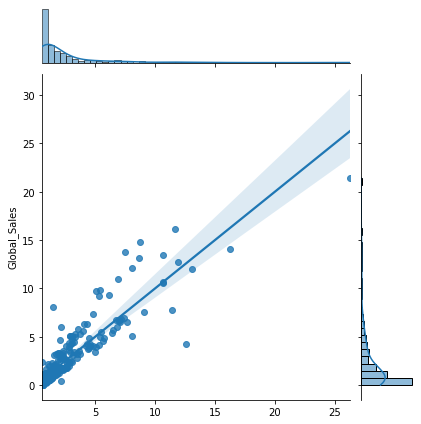

In [475]:
preds =lm.predict(x)

#lm.predict(x) # generate predictions (on training data) using fit model

sns.jointplot(x=preds,y=y, kind='reg')

In [476]:
#exp1 (scale X data)

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')
lm.fit(x,y)
print(f'Ridge Regression test R^2: {lm.score(X_test, y_test):.3f}')

Ridge Regression val R^2: 0.749
Ridge Regression test R^2: -1.048


In [479]:
#exp2 (poly on X)

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')
lm.fit(x,y)
print(f'Degree Regression test R^2: {lm.score(X_test, y_test):.3f}')


Degree 2 polynomial regression val R^2: 0.718
Degree Regression test R^2: -1.048


In [486]:
#exp3 (feature engenering-dummy ) 

df['Platform'].nunique()

19

In [487]:
pd.get_dummies(df['Platform']).head()

,2600,3DS,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [492]:
X1 = x.copy()

X1['Platform'] = df['Platform']

split_and_validate(pd.get_dummies(X1), y)


Validation R^2 score was: 0.8862726995222974


In [489]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)



In [490]:
split_and_validate(dumy,y)

ValueError: Found input variables with inconsistent numbers of samples: [406, 324]

In [405]:
#lm.fit(x,y)
#print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

In [404]:
model = sm.OLS(y,x)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Global_Sales   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              1066.
Date:                Wed, 01 Dec 2021   Prob (F-statistic):                   9.38e-143
Time:                        21:53:51   Log-Likelihood:                         -567.45
No. Observations:                 324   AIC:                                      1139.
Df Residuals:                     322   BIC:                                      1146.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
JP_Sales        0.1747      0.563      0.310      0.757      -0.933       1.283
Other_Sales     6.7398      0.193     34.992      0.000       6.361       7.119
==============================================================================
Omnibus:                       81.518   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2415.415
Skew:                          -0.131   Prob(JB):                         0.00
Kurtosis:                      16.374   Cond. No.                         4.04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  evaluate model performance using  RMSE and MAE to determine errors


In [338]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y, preds, squared=False)
mae = mean_absolute_error(y, preds)

In [339]:
print(rmse)
print(mae)

2.0026234509628833
1.177616963451394


In [340]:
# Calculate and print r2_score

y_pred=lm.predict(X_test)
from sklearn.metrics import r2_score
#print ("R2 Score value: {:.4f}".format(r2_score(X_val,y_test)))
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.3838
